<a href="https://colab.research.google.com/github/OskarBelza/ML-DL/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotwanie i analzia danych

## Pobieranie bazy

In [ ]:
#instalacja pakietu gdown
!pip install -U --no-cache-dir gdown --pre
#usuwanie i tworzenie pustego katalogu data
!rm -rf data && mkdir data
#pobieranie zip-a ze zdjęciami
!gdown 15J9oqBoEYVMF6-9csFpAm1uuA2cFSvbl -O archive.zip
#rozpakowywanie pliku archive.zip do katalogu data
!tar -xf archive.zip -d data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=15J9oqBoEYVMF6-9csFpAm1uuA2cFSvbl
To: /content/archive.zip
100% 3.69k/3.69k [00:00<00:00, 17.3MB/s]


## Wczytanie bibliotek

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Wczytanie zbioru danych

In [ ]:
# Wczytanie pliku csv do dataframu
data = pd.read_csv('data/Iris.csv')

# Wyświetlenie pierwszych pięciu wierszy w celu sprawdzenia poprawności wczytanego kodu
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Opis kolumn

* SepalLengthCm - Długosc kielicha w cm
* SepalWidthCm - Szerokosc kielicha w cm
* PetalLengthCm	- Dlugosc płatka w cm
* PetalWidthCm - Szerokosc płatka w cm
* Species - Garunek Irysa

## Analiza podstawowych statystyk

### Liczba obserwacji i cech

In [ ]:
# Liczba obserwacji
print(f'Liczba obserwacji {len(data)}')

# Liczba cech
print(f'Liczba kolumn {len(data.columns)}')

Liczba obserwacji 150
Liczba kolumn 6


In [ ]:
# Liczba probek kazdego gatunku
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Statystyki opisowe

In [ ]:
# Statystyki takie jak mediana, odchylenie itp dla każdej z kolumn
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Brakujace dane

In [ ]:
# Liczba brakujacyh komorek w każdej z kolumn
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Duplikaty

In [ ]:
# Liczba zduplikowanych komórek
data.duplicated().sum()

Brak zduplikowanych komorek

## Wizualizacja danych

### Histogram cech

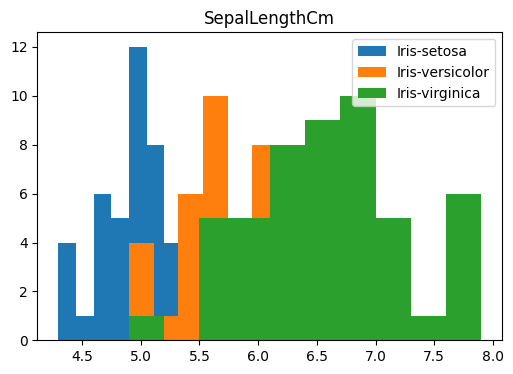

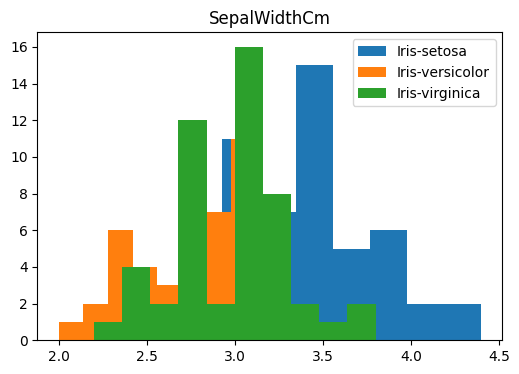

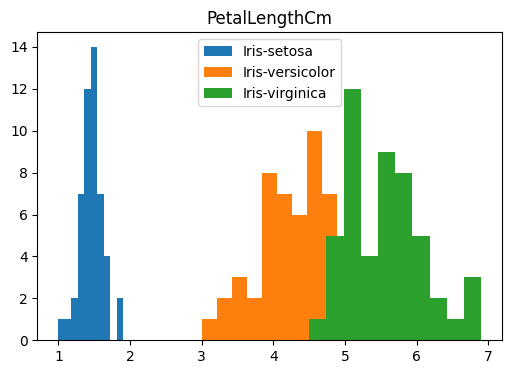

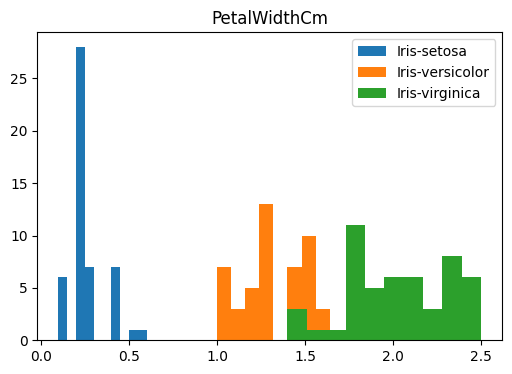

In [ ]:
# Wykresy histogramu każdej z cech
for column in data.columns[1:5]:
    plt.figure(figsize=(6, 4))
    for species in data['Species'].unique():
        plt.hist(data[data['Species'] == species][column], label=species)
    plt.title(column)
    plt.legend()
    plt.show()

### Rozkład gatunkow w zaleznosci od cech

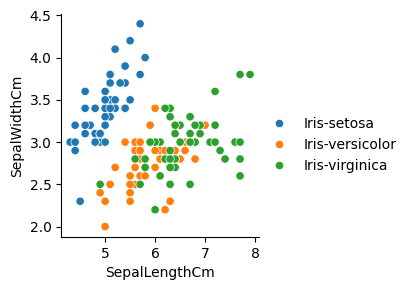

In [ ]:
# Wykres pokazujacy rozklad gatunkow dla dlugosci i szerokosci kielicha
sns.FacetGrid(data) \
.map_dataframe(sns.scatterplot, x="SepalLengthCm", y="SepalWidthCm", hue="Species") \
.add_legend()
plt.show()

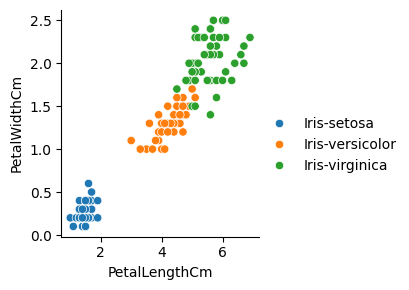

In [ ]:
# Wykres pokazujacy rozklad gatunkow dla dlugosci i szerokosci płatka
sns.FacetGrid(data) \
.map_dataframe(sns.scatterplot, x="PetalLengthCm", y="PetalWidthCm", hue="Species") \
.add_legend()
plt.show()

### Rozkład wartości

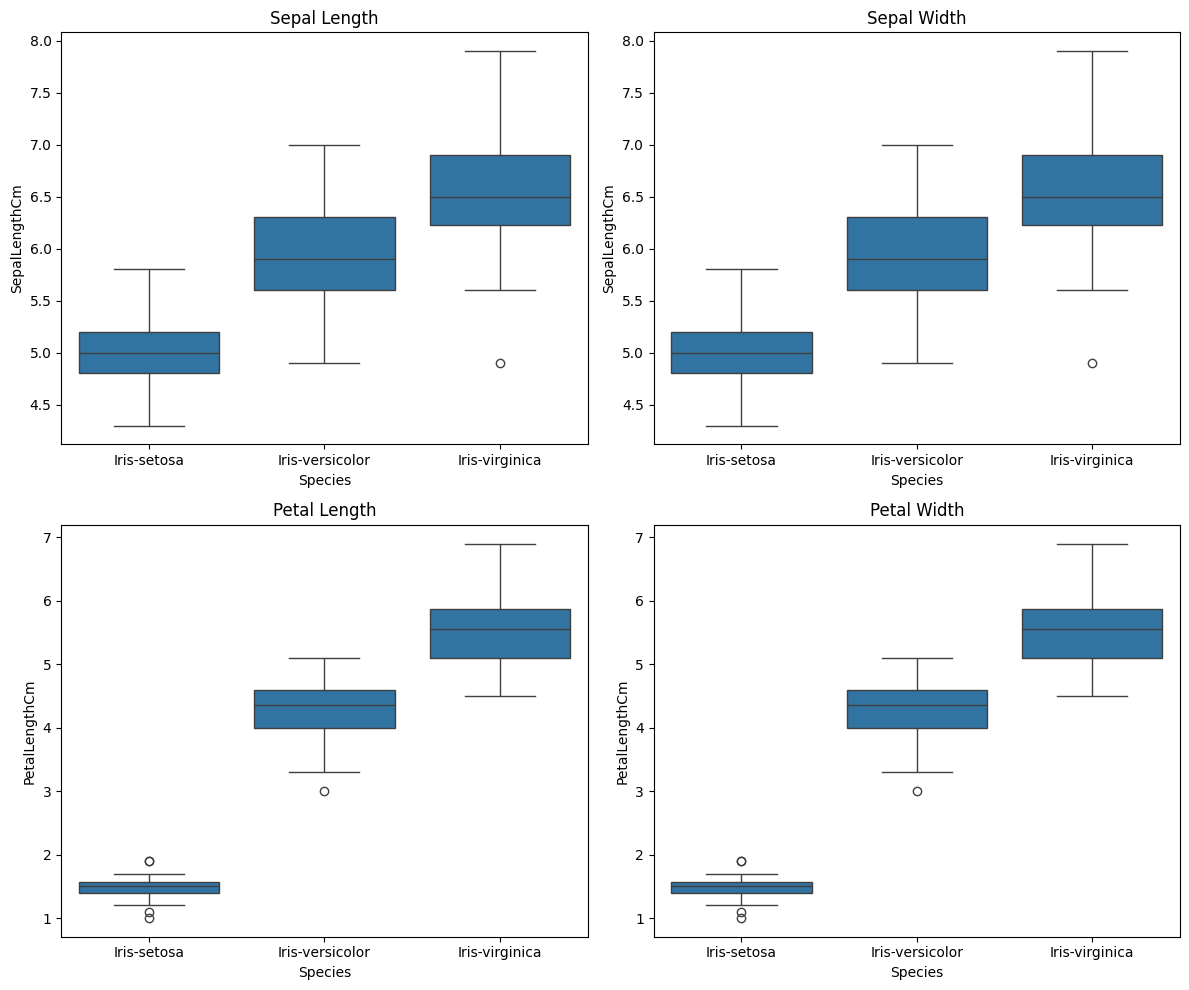

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='Species', y='SepalLengthCm', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.boxplot(x='Species', y='SepalLengthCm', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.boxplot(x='Species', y='PetalLengthCm', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.boxplot(x='Species', y='PetalLengthCm', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

### Mapa korelacji

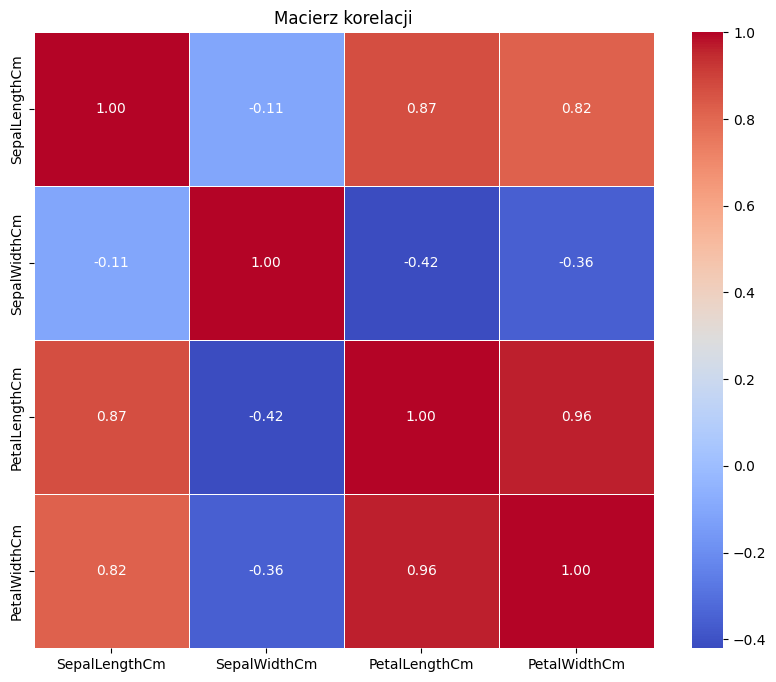

In [ ]:
# Stworzenie macierzy korelacji między cechami
correlation_matrix = data.iloc[:, 1:5].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

## Przygotwanie danych

### Podział na dane wynikowe i cechy

In [ ]:
# Przypisanie cech wykorzytsanych do trenowania do zmiennej X
X = data.iloc[:, 1:5]
# Przypisanie wyników do zmiennej y
y = data.loc[:, 'Species']
# Mapowanie nazw gatunkow na wartosci liczbowe
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
y = y.map(class_mapping)

### Standaryzacja danych

In [ ]:
# Utworzenie obiektu scalera i standaryzacja danych żeby uniknąć zbyt dużych wag
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Podział na dane uczące i testowe

In [ ]:
# Podział na dane trenujące i testowe proporcja 70:30 z przetsowaniem danych
# Dodanie random seed żeby zapewnić powtarzalność wyników
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Trenowanie modelu

## Perceptron

### Trenowanie modelu

In [ ]:
perceptron = Perceptron()

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 500, 1000]
}

# Przeszukiwanie siatki hiperparametrów
grid_search = GridSearchCV(perceptron, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze znalezione parametry
best_params_ppn = grid_search.best_params_
print(f"Najlepsze parametry: {best_params_ppn}")

# Dopasowanie modelu z najlepszymi parametrami
best_perceptron = grid_search.best_estimator_
y_pred = best_perceptron.predict(X_test)

Najlepsze parametry: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet'}


### Ocena modelu

In [ ]:
# Dokładność modelu na zbiorze testowym
ppn_accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {ppn_accuracy:.2f}")

# Macierz pomyłek
ppn_matrix = confusion_matrix(y_test, y_pred)
print(ppn_matrix)

Dokładność modelu: 0.84
[[14  0  0]
 [ 1 12  5]
 [ 0  1 12]]


## KNN

### Trenowanie modelu

In [ ]:
knn = KNeighborsClassifier()

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Przeszukiwanie siatki hiperparametrów
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze znalezione parametry
best_params_knn = grid_search.best_params_
print(f"Najlepsze parametry: {best_params_knn}")

# Dopasowanie modelu z najlepszymi parametrami
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

Najlepsze parametry: {'n_neighbors': 3, 'weights': 'uniform'}


### Ocena modelu

In [ ]:
# Dokładność modelu na zbiorze testowym
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {knn_accuracy:.2f}")

# Macierz pomyłek
knn_matrix = confusion_matrix(y_test, y_pred)
print(knn_matrix)

Dokładność modelu: 0.98
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


## SVC

### Trenowanie modelu

In [ ]:
svc = SVC()

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

# Przeszukiwanie siatki hiperparametrów
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze znalezione parametry
best_params_svc = grid_search.best_params_
print(f"Najlepsze parametry: {best_params_svc}")

# Dopasowanie modelu z najlepszymi parametrami
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

Najlepsze parametry: {'C': 0.1, 'kernel': 'linear'}


### Ocena modelu

In [ ]:
# Dokładność modelu na zbiorze testowym
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {svc_accuracy:.2f}")

# Macierz pomyłek
svc_matrix = confusion_matrix(y_test, y_pred)
print(svc_matrix)

Dokładność modelu: 0.96
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


# Wnioski i porównanie

## Porównanie modeli

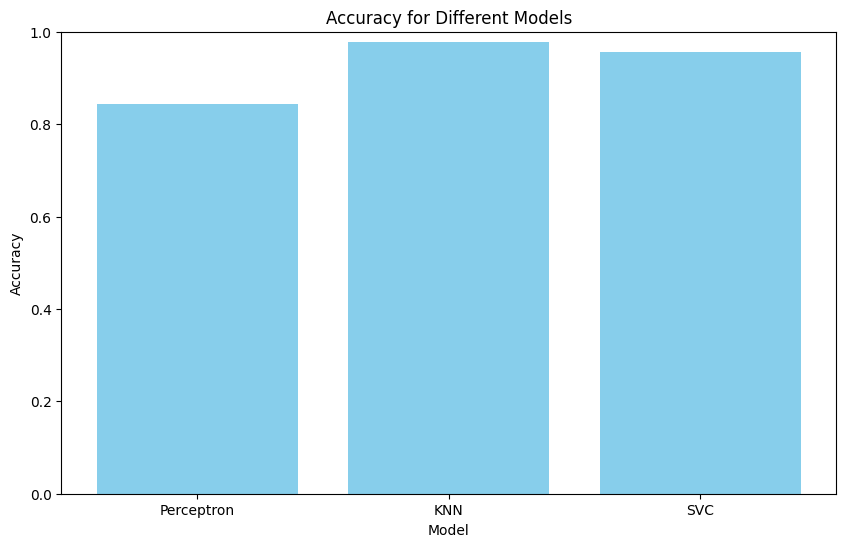

In [ ]:
# Porównanie accuracy modelów
plt.figure(figsize=(10, 6))
plt.bar(['Perceptron', 'KNN', 'SVC'], [ppn_accuracy, knn_accuracy, svc_accuracy], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.ylim(0, 1.0)
plt.show()

In [ ]:
# Porównanie macierzy błędów poszczególnych modelów
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.heatmap(ppn_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Perceptron")

plt.subplot(132)
sns.heatmap(knn_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("KNN")

plt.subplot(133)
sns.heatmap(svc_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("SVC")

plt.show()

## Wnioski

### Wnisoki apropo modeli

Perceptron poradził sobie z wynikiem 84% accuracy myląc głównie target 2 z 3 co ma sens biorąc pod uwagę że po tym jak zwizuwalizowaliśmy dane te dwa wyniki mocno nachodziły na siebie a perceptron nie jest w stanie przewidzieć z 100% dokładnością danych które nie są rozdzielnie liniowo. Do dostosowania hiperparametrów użyliśmy maksymalnej liczby iteracji na 100, metody kary elasticnet oraz parametru alpha na poziomie 0.0001 co stanowi multiplier dla kar naniesionych przez elasticnet

KNN jest modelem który przewiduje wyniki na podstawie liczby k najbliższych sąaiadów, dlatego uzyskaliśmy na nim znacznie lepsze wyniki niż na Perceptronie który jest mocno ograniczony przez rozdzielność liniową. Jeśli chodzi o dostosowanie hiperparametrów wybraliśmy 3 sąsiadów oraz metode wyboru sąsiadów uniform który każdego sąsiada traktuje tak samo

SVC jest modelem który znajduje optymalną płaszczyznę w celu rozdzielenia wyników do tego zadania stosuje rózne kernele, za pomocą metody SearchGrid wybraliśmy kernel liniowy co trochę mnie dziwi biorąc pod uwagę że podobnie jak Perceptron jest on uzależniony od rozdzielności liniowych danych i przypuszczałbym że kernel taki ja rbf poradzi sobie tutaj lepiej, ale może z racji na to że jest to dość prosty zbiór danych kernel liniowy okazał się najlepszy dodarkow jako parametr regularyzacji wskazaliśmy C na 0.1

### Wnioski ogólne

Wczytaliśmy zbiór danych Irys który składał się z 3 gatunków kwiatów opisanych przez 4 parametry długość i szerokość płatka oraz kielicha, zwizualizowaliśmy sobie nasze dane i sprawdziliśmy nasz zbiór w poszukiwaniu duplikatów i wartości brakujących następnie ustandaryziwaliśmy za pomocą funkcji StandardScaler z biblioteki sklearn i podzieliśmy na dane uczące i testowe.
Następnie wybraliśmy 3 modele, klasyczny Perceptron, KNN model K najbliższych sąsiadów i SVC klasyfikator oparty na modelu wektorów nośnych. Za pomocą metody GridSearchCv wyszukaliśmy najlepsze hiperparametry dla danych modeli i wytrnowaliśmy z ich pomocą 3 modele. W celu wizualizacji przedsatwiliśmy metryke accuracy i macierz błędów. Na tej podstawie możemy wnioskować że najgorszy jest klasyczny model Perceptrony co nie dziwi biorąc pod uwagę że jest on najprosztszym modelem, KNN i SVC natomiast są modelami o podobnych rezultatch z drobną przewagą KNN